# **“ARTARA ID (Aplikasi Resep Kue Tradisional Nusantara) untuk Mengenali Jenis Kue Tradisional dan Cara Pembuatannya Menggunakan Algoritma Convolutional Neural Network”**


#DATA EXPLORATION

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lokasi = '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset'
filenames = os.listdir(lokasi)
filenames

['cucur',
 'kue_pukis',
 'dadar_gulung',
 'kue_sus',
 'kue_cubit',
 'kue_lupis',
 'data_selain_kue',
 'putu_ayu',
 'bika_ambon',
 'onde_onde',
 'klepon']

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders
#
splitfolders.ratio('/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset', 
                   output="/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split", seed=1337, ratio=(.8, .1, .1))


Copying files: 3212 files [31:53,  1.68 files/s]


In [ ]:
os.listdir('/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train')

['putu_ayu',
 'bika_ambon',
 'cucur',
 'kue_pukis',
 'onde_onde',
 'dadar_gulung',
 'kue_sus',
 'kue_cubit',
 'klepon',
 'kue_lupis',
 'data_selain_kue']

In [ ]:
base_path = "/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split"
train_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'val')
test_path = os.path.join(base_path, 'test')

In [ ]:
test_path

'/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test'

In [ ]:
list_kue = os.listdir(test_path)
list_kue

['putu_ayu',
 'bika_ambon',
 'cucur',
 'kue_pukis',
 'onde_onde',
 'dadar_gulung',
 'kue_sus',
 'kue_cubit',
 'klepon',
 'kue_lupis',
 'data_selain_kue']

In [ ]:
kue_path =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/{kue}')
  kue_path.append(dir)
  print(f'Jumlah image kue {kue} : {len(os.listdir(dir))}')

Jumlah image kue putu_ayu : 308
Jumlah image kue bika_ambon : 313
Jumlah image kue cucur : 301
Jumlah image kue kue_pukis : 304
Jumlah image kue onde_onde : 314
Jumlah image kue dadar_gulung : 302
Jumlah image kue kue_sus : 317
Jumlah image kue kue_cubit : 238
Jumlah image kue klepon : 234
Jumlah image kue kue_lupis : 317
Jumlah image kue data_selain_kue : 264


In [ ]:
kue_path =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/{kue}')
  kue_path.append(dir)
  print(f'Jumlah image kue {kue} : {len(os.listdir(dir))}')

Jumlah image kue putu_ayu : 308
Jumlah image kue bika_ambon : 313
Jumlah image kue cucur : 301
Jumlah image kue kue_pukis : 304
Jumlah image kue onde_onde : 314
Jumlah image kue dadar_gulung : 302
Jumlah image kue kue_sus : 317
Jumlah image kue kue_cubit : 238
Jumlah image kue klepon : 234
Jumlah image kue kue_lupis : 317
Jumlah image kue data_selain_kue : 264


In [ ]:
kue_path =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/{kue}')
  kue_path.append(dir)

kue_path

['/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/putu_ayu',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/bika_ambon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/cucur',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/kue_pukis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/onde_onde',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/dadar_gulung',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/kue_sus',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/kue_cubit',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/klepon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/kue_lupis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/test/data_selain_kue']

In [ ]:
list_kue

['putu_ayu',
 'bika_ambon',
 'cucur',
 'kue_pukis',
 'onde_onde',
 'dadar_gulung',
 'kue_sus',
 'kue_cubit',
 'klepon',
 'kue_lupis',
 'data_selain_kue']

In [ ]:
categories = []
names = []

for i in range(11):
  for kue in os.listdir(kue_path[i]):
    if kue in names:
      names.remove(kue)
      categories.remove(i)
    else:
      names.append(kue)
      categories.append(i)
    
df_test = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_test

,filename,category
0,549_a3d78dc2.jpg,0
1,010_c24b5d5e.jpg,0
2,017_dcf60d11.jpg,0
3,038_556b7315.jpg,0
4,037_f1c787b8.jpg,0
...,...,...
429,IMG_20220103_142117_962.jpg,10
430,IMG_20220103_150019_505.jpg,10
431,IMG_20220103_142032_239.jpg,10
432,IMG_20220103_142121_539.jpg,10


In [ ]:
df_test.to_csv('/content/drive/MyDrive/Orbit/PROJEK AKHIR/test.csv')

In [ ]:
val =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/{kue}')
  val.append(dir)

val

['/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/putu_ayu',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/bika_ambon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/cucur',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/kue_pukis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/onde_onde',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/dadar_gulung',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/kue_sus',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/kue_cubit',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/klepon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/kue_lupis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/val/data_selain_kue']

In [ ]:
categories = []
names = []

for i in range(11):
  for kue in os.listdir(val[i]):
    if kue in names:
      names.remove(kue)
      categories.remove(i)
    else:
      names.append(kue)
      categories.append(i)
    
df_val = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_val

,filename,category
0,007_7d189394.jpg,0
1,005_218848ef.jpg,0
2,013_0d8bba44.jpg,0
3,009_fead6f24.jpg,0
4,025_bf0e4174.jpg,0
...,...,...
444,IMG_20220103_141857_955.jpg,10
445,IMG_20220103_141511_573.jpg,10
446,IMG_20220103_161529_443.jpg,10
447,IMG_20220103_140719_743.jpg,10


In [ ]:
df_val.to_csv('/content/drive/MyDrive/Orbit/PROJEK AKHIR/val.csv')

In [ ]:
train =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/{kue}')
  train.append(dir)

train

['/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/putu_ayu',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/bika_ambon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/cucur',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/kue_pukis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/onde_onde',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/dadar_gulung',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/kue_sus',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/kue_cubit',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/klepon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/kue_lupis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/data_selain_kue']

In [ ]:
categories = []
names = []

for i in range(11):
  for kue in os.listdir(train[i]):
    if kue in names:
      names.remove(kue)
      categories.remove(i)
    else:
      names.append(kue)
      categories.append(i)
    
df_train = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_train

,filename,category
0,549_a3d78dc2.jpg,0
1,007_7d189394.jpg,0
2,005_218848ef.jpg,0
3,009_fead6f24.jpg,0
4,010_c24b5d5e.jpg,0
...,...,...
2761,IMG_20220103_140807_338.jpg,10
2762,IMG_20220103_162055_466.jpg,10
2763,IMG_20220103_140838_772.jpg,10
2764,IMG_20220103_140801_511.jpg,10


In [ ]:
df_train.to_csv('/content/drive/MyDrive/Orbit/PROJEK AKHIR/train.csv')

In [ ]:
total =[]
for kue in list_kue:
  dir = os.path.join(f'/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/{kue}')
  total.append(dir)

total

['/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/putu_ayu',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/bika_ambon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/cucur',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_pukis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/onde_onde',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/dadar_gulung',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_sus',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_cubit',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/klepon',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_lupis',
 '/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/data_selain_kue']

In [ ]:
for i in total:
   print(i)

/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/putu_ayu
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/bika_ambon
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/cucur
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_pukis
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/onde_onde
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/dadar_gulung
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_sus
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_cubit
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/klepon
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/kue_lupis
/content/drive/MyDrive/Orbit/PROJEK AKHIR/dataset/data_selain_kue


In [ ]:
categories = []
names = []

for i in total:
  for kue in os.listdir(i):
    if kue in names:
      names.remove(kue)
      categories.remove(i.split('/')[7])
    else:
      names.append(kue)
      categories.append(i.split('/')[7])
    
df_total = pd.DataFrame({
    'filename': names,  
    'category': categories,  
})

df_total

,filename,category
0,582_be4d90be.jpg,putu_ayu
1,362_422c78ce.jpg,putu_ayu
2,493_111617ea.jpg,putu_ayu
3,130_01132fc7.jpg,putu_ayu
4,549_a3d78dc2.jpg,putu_ayu
...,...,...
3207,IMG_20220103_161827_630.jpg,data_selain_kue
3208,IMG_20220103_161829_119.jpg,data_selain_kue
3209,IMG_20220103_161529_443.jpg,data_selain_kue
3210,IMG_20220103_161544_060.jpg,data_selain_kue


kue_lupis          317
kue_sus            317
onde_onde          314
bika_ambon         313
putu_ayu           308
kue_pukis          304
dadar_gulung       302
cucur              301
data_selain_kue    264
kue_cubit          238
klepon             234
Name: category, dtype: int64

 Total images:  3212


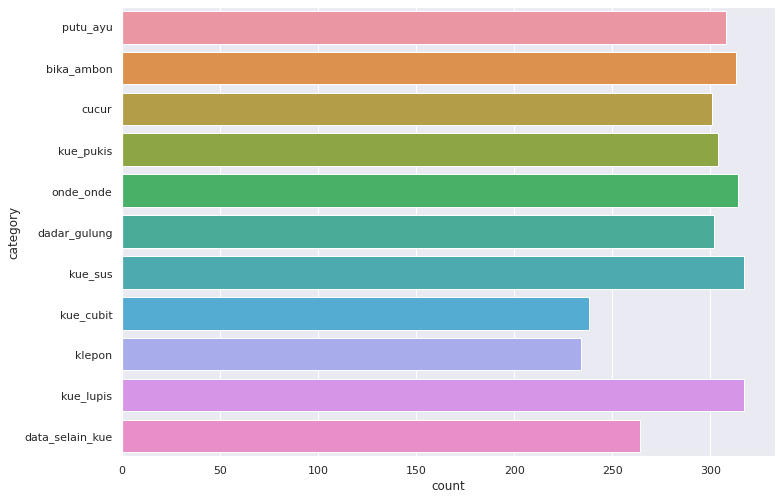

In [ ]:
import seaborn as sns
print(df_total.category.value_counts())
print("\n Total images: ", df_total.shape[0])

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = df_total, y = 'category')
plt.show()

In [ ]:
total_test = len(df_test)
total_test

434

In [ ]:
total_train = len(df_train)
total_train

2766

In [ ]:
total_val = len(df_val)
total_val

449

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1.0/255.0,
                    rotation_range=20,
                    width_shift_range = 6.2, height_shift_range= 0.2,
                    #brightness_range=(0, 0.4),
                    horizontal_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    )

# validation dataset tidak erlu augmentasi
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        train_path,
                        classes=list_kue,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical'
                    )

validation_generator = validation_datagen.flow_from_directory(
                        validation_path,
                        classes=list_kue,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 2766 images belonging to 11 classes.
Found 449 images belonging to 11 classes.


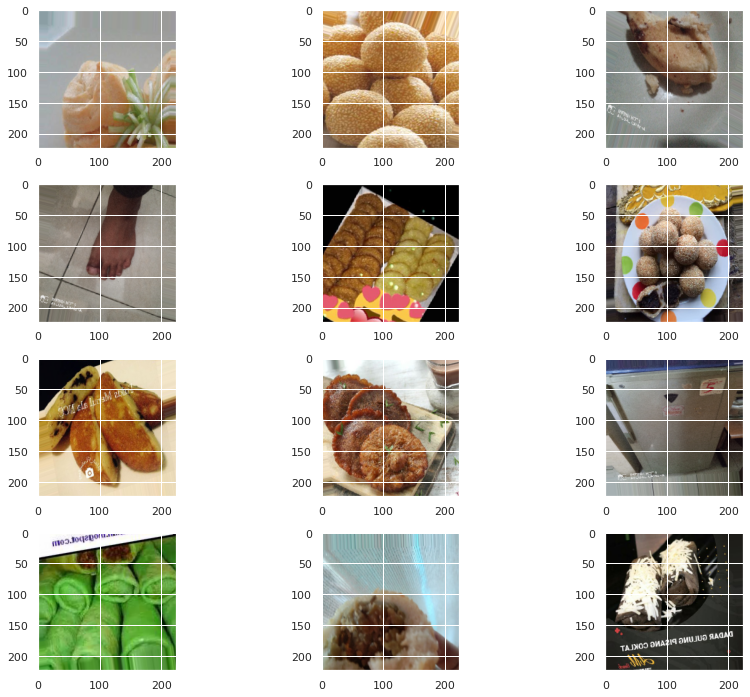

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#MODELING

In [ ]:
from tensorflow.keras import layers

base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224,224,3),weights='imagenet',include_top=False)


#base_model = ResNet50(input_shape=(224, 224, 3), include_top=True, weights='imagenet')

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
# Ketik code di atas di sini
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Ketik code di atas di sini

# Flattening
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(512, activation='relu')(x)

# Dropout
x = layers.Dropout(0.4)(x)

# Menambahkan layer output dengan fungsi sigmoid untuk klasifikasi
x = layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/Orbit/model_projek_mobileNetPart3.h5'
best_model_2 = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)


In [ ]:
# Ketik code di atas di sini

import time 
start_time = time.time()

# Ketik code di atas di sini

epochs=100
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    verbose=1,
                    steps_per_epoch=10,
                    callbacks = [best_model_2])

print("Running time: --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 4.6769 - acc: 0.2031 
Epoch 00001: val_acc improved from -inf to 0.63920, saving model to /content/drive/MyDrive/Orbit/model_projek_mobileNetPart3.h5
10/10 [==============================] - 490s 51s/step - loss: 4.6769 - acc: 0.2031 - val_loss: 1.1979 - val_acc: 0.6392
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.9456 - acc: 0.5250 
Epoch 00002: val_acc improved from 0.63920 to 0.74610, saving model to /content/drive/MyDrive/Orbit/model_projek_mobileNetPart3.h5
10/10 [==============================] - 206s 21s/step - loss: 1.9456 - acc: 0.5250 - val_loss: 0.8632 - val_acc: 0.7461
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 1.1545 - acc: 0.6625 
Epoch 00003: val_acc did not improve from 0.74610
10/10 [==============================] - 187s 19s/step - loss: 1.1545 - acc: 0.6625 - val_loss: 0.7690 - val_acc: 0.7283
Epoch 4/100
10/10 [==============================] - ET

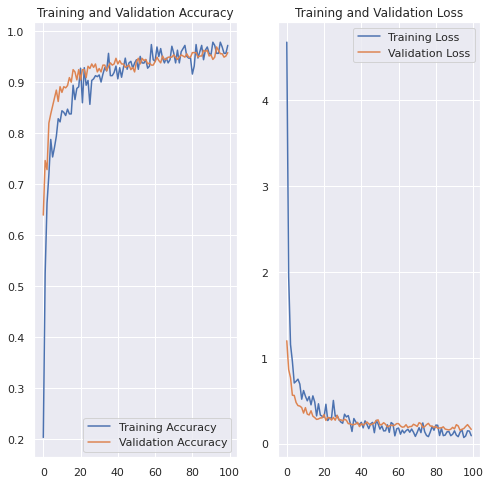

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc'] 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Orbit/model_projek_mobileNetPart3.png', format='png')

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Orbit/model_projek_mobileNetPart3.h5')

In [ ]:
model.save('/content/drive/MyDrive/Orbit/PROJEK AKHIR/MODEL/model_projek_mobileNetPart3')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit/PROJEK AKHIR/MODEL/model_projek_mobileNetPart3/assets


# EVALUASI

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
batch_size = 1

test_generator = test_datagen.flow_from_directory(
                        test_path,
                        classes=list_kue,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode='categorical',
                        shuffle=False)

Found 434 images belonging to 11 classes.


In [ ]:
score = model.evaluate(test_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

14/14 [==============================] - 247s 19s/step - loss: 0.2443 - acc: 0.9516

 Test accuracy: 0.9516128897666931


In [ ]:
score = model.evaluate(validation_generator)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

15/15 [==============================] - 27s 2s/step - loss: 0.1551 - acc: 0.9688

 Test accuracy: 0.9688196182250977


In [ ]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (224, 224))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

In [ ]:
# Read Test Images Dir and their labels
test_images_dir = '/content/drive/MyDrive/Orbit/PROJEK AKHIR/test_kue/'
test_df = pd.read_csv('/content/drive/MyDrive/Orbit/PROJEK AKHIR/test.csv')

# put them in a list
test_dfToList = test_df['filename'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('/content/drive/MyDrive/Orbit/model/test_preproc_projek.npy', test_preprocessed_images)

In [ ]:
array = model.predict(test_preprocessed_images, batch_size=2, verbose=1)
answer = np.argmax(array, axis=1)
print(answer)

217/217 [==============================] - 3s 9ms/step
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  8  0  0  0  0  0  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  1  1 10  1  1  1
  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  5  1  3  3  3  7  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  2  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  5  3  5  5  5  5  3  5  5  5  5  5
  5  5  5  5  0  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  5  7  7  7  7  7  6  6

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Orbit/PROJEK AKHIR/test.csv')
y_true = test_df['category']
y_pred = array
print(y_true)

0       0
1       0
2       0
3       0
4       0
       ..
429    10
430    10
431    10
432    10
433    10
Name: category, Length: 434, dtype: int64


In [ ]:
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[43,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0, 53,  0,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 28,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 52,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 22,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 26]])

In [ ]:
train_dir = '/content/drive/MyDrive/Orbit/PROJEK AKHIR/data_split/train/'
classes = os.listdir(train_dir)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


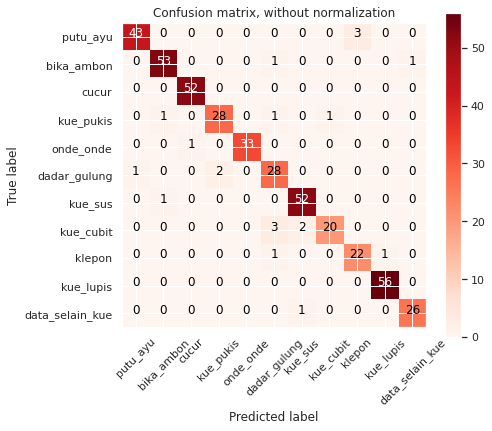

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(7,6))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix, without normalization')
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Orbit/confmax_projek_moblieNet.png', format='png')

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, answer))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        46
           1       0.96      0.96      0.96        55
           2       0.98      1.00      0.99        52
           3       0.93      0.90      0.92        31
           4       1.00      0.97      0.99        34
           5       0.82      0.90      0.86        31
           6       0.95      0.98      0.96        53
           7       0.95      0.80      0.87        25
           8       0.88      0.92      0.90        24
           9       0.98      1.00      0.99        56
          10       0.96      0.96      0.96        27

    accuracy                           0.95       434
   macro avg       0.95      0.94      0.94       434
weighted avg       0.95      0.95      0.95       434

